In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import random

%matplotlib inline

os.getcwd()
dis = pd.read_csv("/Users/HudsonCavanagh/dsi-projects/projects/2nd/billboard.csv")
bb = pd.DataFrame(dis)
type(bb)



pandas.core.frame.DataFrame

In [2]:
def empty_replace(value):
    if value == '*' or '':
        return np.nan
    else:
        return value      
    
def time_clean1(val):
    return val[0:7].replace(',', ':')


# bb_str.iloc[1:,7:83].apply(pd.convert_objects(convert_numeric=True))
# #print(type(bb['x2nd.week'][2]))

bb['time_on_bb100'] = bb.iloc[:,7:83].count(axis=1)

bb.head()
genres = bb["genre"].value_counts() #genres works
bb["peak_date"] = pd.to_datetime(bb["date.peaked"])
bb["entered_date"] = pd.to_datetime(bb["date.entered"])
bb["time"] = (bb["time"]).apply(time_clean1)
bb["track_length"] = pd.to_timedelta(bb["time"])
bb = bb.applymap(empty_replace)
bb.iloc[:,7:83] = bb.iloc[:,7:83].applymap(lambda x: float(x))
bb['genre'].replace("Rock'n'roll", "Rock", inplace=True)  
bb.groupby(['artist.inverted','genre', 'track'])
bb['weeks_on_bb100'] = bb.iloc[:,7:83].count(axis=1)
bb['avg_on_bb100'] = bb.iloc[:,7:83].mean(axis=1)
bb['peak_rank'] = bb.iloc[:,7:83].apply(np.min,axis=1) #had previously used max, this is returning weirdly  idxmax
bb['worst_rank'] = bb.iloc[:,7:83].max(axis=1) #had previously used max
bb['bb_ratio'] = bb['time_on_bb100']/ (bb['avg_on_bb100'])
#create column that combined avg_on_bb100, and time to convert to $
#can use dollars to evaluate track length, or time on x axis(peak date) to see if things are 'getting better'
bb.drop(bb.columns[7:83], axis=1, inplace=True)
bb.drop(bb.columns[5], axis=1, inplace=True)
bb.drop(bb.columns[3], axis=1, inplace=True)
bb.drop(bb.columns[4], axis=1, inplace=True)
bb.rename(columns={'artist.inverted': 'artist'}, inplace=1) 
bb.head()


,year,artist,track,genre,time_on_bb100,peak_date,entered_date,track_length,weeks_on_bb100,avg_on_bb100,peak_rank,worst_rank,bb_ratio
0,2000,Destiny's Child,Independent Women Part I,Rock,76,2000-11-18,2000-09-23,03:38:00,28,14.821429,1,78,5.127711
1,2000,Santana,"Maria, Maria",Rock,75,2000-04-08,2000-02-12,04:18:00,26,10.500000,1,48,7.142857
2,2000,Savage Garden,I Knew I Loved You,Rock,76,2000-01-29,1999-10-23,04:07:00,33,17.363636,1,71,4.376963
3,2000,Madonna,Music,Rock,73,2000-09-16,2000-08-12,03:45:00,24,13.458333,1,44,5.424149
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,73,2000-10-14,2000-08-05,03:38:00,21,19.952381,1,57,3.658711


In [3]:
#pivot_table by artist so we can see their total time on the chart and rank them by that valuye
#run scatter of song length to how long it was 'big'
art_track_view = pd.pivot_table(bb, index=['artist','track'], values=['peak_rank', 'bb_ratio'], aggfunc=(np.mean), margins=1).sort_values(by="bb_ratio", ascending=0)
print(art_track_view)


#pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=[np.mean,len])

                                                                    bb_ratio  \
artist                       track                                             
Santana                      Maria, Maria                           7.142857   
Madonna                      Music                                  5.424149   
Destiny's Child              Independent Women Part I               5.127711   
N'Sync                       Bye Bye Bye                            5.118902   
Elliott, Missy "Misdemeanor" Hot Boyz                               5.093023   
Iglesias, Enrique            Be With You                            4.605678   
Aaliyah                      Try Again                              4.562852   
Savage Garden                I Knew I Loved You                     4.376963   
Houston, Whitney             My Love Is Your Love                   4.256000   
Pink                         There U Go                             4.080537   
matchbox twenty              Bent       

In [4]:
track_view = pd.pivot_table(bb, index=['track', 'artist'], values=['peak_rank', 'bb_ratio'], aggfunc=(np.mean), margins=1).sort_values(by=['bb_ratio'], ascending=0)
print(track_view)
#works! at least for bb_score

                                                                    bb_ratio  \
track                                 artist                                   
Maria, Maria                          Santana                       7.142857   
Music                                 Madonna                       5.424149   
Independent Women Part I              Destiny's Child               5.127711   
Bye Bye Bye                           N'Sync                        5.118902   
Hot Boyz                              Elliott, Missy "Misdemeanor"  5.093023   
Be With You                           Iglesias, Enrique             4.605678   
Try Again                             Aaliyah                       4.562852   
I Knew I Loved You                    Savage Garden                 4.376963   
My Love Is Your Love                  Houston, Whitney              4.256000   
There U Go                            Pink                          4.080537   
Bent                                  ma

This is a printout of all the songs that made it to #1

What A Girl Wants                                  Aguilera, Christina  3.784017   
Independent Women Part I                           Destiny's Child      5.127711   
It's Gonna Be Me                                   N'Sync               3.413284   
Be With You                                        Iglesias, Enrique    4.605678   
Say My Name                                        Destiny's Child      3.640719   
Incomplete                                         Sisqo                3.085443   
Come On Over Baby (All I Want Is You)              Aguilera, Christina  3.658711   
With Arms Wide Open                                Creed                2.246541   
Bent                                               matchbox twenty      4.077029   
Try Again                                          Aaliyah              4.562852   
Music                                              Madonna              5.424149   
I Knew I Loved You                                 Savage Garden        4.376963   
Maria, Maria                                       Santana              7.142857   
Doesn't Really Matter                              Janet                3.759657   
Everything You Want                                Vertical Horizon     3.544937   
Thank God I Found You                              Carey, Mariah        1.972973   
Amazed                                             Lonestar             2.731293 

In [5]:
artist_view = pd.pivot_table(bb, index=['artist'], values=['peak_rank', 'bb_ratio'], aggfunc=(np.mean), margins=1).sort_values(by=['bb_ratio'], ascending=0)
print(artist_view)
#works! at least for bb_score
#peak_rank is the average of the highest point that those artists songs reached

                              bb_ratio  peak_rank
artist                                           
Santana                       7.142857   1.000000
Elliott, Missy "Misdemeanor"  5.093023   5.000000
N'Sync                        4.118572   3.333333
matchbox twenty               4.077029   1.000000
Destiny's Child               4.027260   1.666667
Pink                          3.785166   5.500000
Ruff Endz                     3.764479   5.000000
Janet                         3.759657   1.000000
Madonna                       3.560912  15.000000
Blaque                        3.520767   5.000000
Gray, Macy                    3.507692   5.000000
Aguilera, Christina           3.489070   1.666667
Sonique                       3.435028   8.000000
Dion, Celine                  3.057471   6.000000
Aaliyah                       2.982675  18.000000
Savage Garden                 2.972585  12.500000
Mumba, Samantha               2.909420   4.000000
Iglesias, Enrique             2.900048  16.500000


In [6]:
harv_lang = pd.read_csv("/Users/HudsonCavanagh/dsi-projects/projects/2nd/inquirer_basic.csv")
#downloaded from http://www.wjh.harvard.edu/~inquirer/spreadsheet_guide.htm
lang = pd.DataFrame(harv_lang)

lang.head()
#transform post and nega into lists that I can reference


/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (63,108,109,110,176) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined
0,A,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DET ART,| article: Indefinite singular article--some o...
1,ABANDON,H4Lvd,NaN,Negativ,NaN,NaN,Ngtv,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|
2,ABANDONMENT,H4,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|
3,ABATE,H4Lvd,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|
4,ABATEMENT,Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,NaN


In [7]:
def null_checker(series):
    null_list = []
    for i in range(len(series)):
        if pd.isnull(series[i]) == True:
            null_list.append(series[i])
    print("Null %:", (len(null_list)*100)/len(series))
    
    
print("Positiv:", lang['Positiv'].value_counts(), 
      "Negativ:", lang['Negativ'].value_counts())

('Positiv:', Positiv    1915
Name: Positiv, dtype: int64, 'Negativ:', Negativ    2291
Name: Negativ, dtype: int64)


In [8]:
#Creating a list of positive words

positive_words = []
for i in range(len(lang['Positiv'])):
    if lang['Positiv'][i] == 'Positiv':
        positive_words.append(lang['Entry'][i].split('#')[0]) #cleaning symbols and numbers denoting multiple definitions?

        
print(positive_words)
    



['ABIDE', 'ABILITY', 'ABLE', 'ABOUND', 'ABSOLVE', 'ABSORBENT', 'ABSORPTION', 'ABUNDANCE', 'ABUNDANT', 'ACCEDE', 'ACCENTUATE', 'ACCEPT', 'ACCEPTABLE', 'ACCEPTANCE', 'ACCESSIBLE', 'ACCESSION', 'ACCLAIM', 'ACCLAMATION', 'ACCOLADE', 'ACCOMMODATE', 'ACCOMMODATION', 'ACCOMPANIMENT', 'ACCOMPLISH', 'ACCOMPLISHMENT', 'ACCORD', 'ACCORD', 'ACCORD', 'ACCORDANCE', 'ACCOUNTABLE', 'ACCRUE', 'ACCURACY', 'ACCURATE', 'ACCURATENESS', 'ACHIEVE', 'ACHIEVEMENT', 'ACKNOWLEDGEMENT', 'ACQUAINT', 'ACQUAINTANCE', 'ACQUIT', 'ACQUITTAL', 'ACTUAL', 'ACTUAL', 'ACTUALITY', 'ADAMANT', 'ADAPTABILITY', 'ADAPTABLE', 'ADAPTATION', 'ADAPTIVE', 'ADEPT', 'ADEPTNESS', 'ADEQUATE', 'ADHERENCE', 'ADHERENT', 'ADHESION', 'ADHESIVE', 'ADJUNCT', 'ADJUST', 'ADJUSTABLE', 'ADJUSTMENT', 'ADMIRABLE', 'ADMIRATION', 'ADMIRE', 'ADMIRER', 'ADMIT', 'ADMIT', 'ADMIT', 'ADMITTANCE', 'ADORABLE', 'ADORE', 'ADORN', 'ADORNMENT', 'ADROIT', 'ADROITLY', 'ADULATION', 'ADULT', 'ADVANCE', 'ADVANCE', 'ADVANCE', 'ADVANCEMENT', 'ADVANTAGE', 'ADVANTAGEOUS', '

In [9]:
#negative words

negative_words = []
for i in range(len(lang['Negativ'])):
    if lang['Negativ'][i] == 'Negativ':
        negative_words.append(lang['Entry'][i].split('#')[0]) #cleaning definitions

        
print(negative_words)
    


['ABANDON', 'ABANDONMENT', 'ABATE', 'ABDICATE', 'ABHOR', 'ABJECT', 'ABNORMAL', 'ABOLISH', 'ABOMINABLE', 'ABRASIVE', 'ABRUPT', 'ABSCOND', 'ABSENCE', 'ABSENT', 'ABSENT-MINDED', 'ABSENTEE', 'ABSURD', 'ABSURDITY', 'ABUSE', 'ABUSE', 'ABYSS', 'ACCIDENT', 'ACCOST', 'ACCURSED', 'ACCUSATION', 'ACCUSE', 'ACCUSE', 'ACHE', 'ACRIMONIOUS', 'ACRIMONY', 'ADDICT', 'ADDICTION', 'ADMONISH', 'ADMONITION', 'ADULTERATE', 'ADULTERATION', 'ADULTERY', 'ADVERSARY', 'ADVERSE', 'ADVERSITY', 'AFFECTATION', 'AFFLICT', 'AFFLICTION', 'AFRAID', 'AGAINST', 'AGGRAVATE', 'AGGRAVATION', 'AGGRESSION', 'AGGRESSIVE', 'AGGRESSIVENESS', 'AGGRESSOR', 'AGGRIEVE', 'AGHAST', 'AGITATE', 'AGITATION', 'AGITATOR', 'AGONIZE', 'AGONY', 'AIL', 'AILMENT', 'AIMLESS', 'ALARM', 'ALARMING', 'ALAS', 'ALIBI', 'ALIEN', 'ALIENATE', 'ALIENATION', 'ALLEGATION', 'ALLEGE', 'ALOOF', 'ALTERCATION', 'AMBIGUITY', 'AMBIGUOUS', 'AMBIVALENT', 'AMBUSH', 'AMBUSH', 'AMISS', 'AMPUTATE', 'ANARCHIST', 'ANARCHY', 'ANGER', 'ANGER', 'ANGRY', 'ANGUISH', 'ANIMOSITY', 

In [10]:
bb['track_pos'] = np.NaN
bb['track_pos'].fillna(0, inplace=True)

bb['track_neg'] = np.NaN
bb['track_neg'].fillna(0, inplace=True)

for i in range(len(bb['track'])):
    for h in bb['track'][i].split():  
        if any(h in s for s in positive_words):
            bb.ix[i,'track_pos'] += 1
    for c in bb['track'][i].split():
        if any(c in q for q in negative_words):
            bb.ix[i,'track_neg'] += -1

print(bb['track_pos'],bb['track_neg'])

#the output here is that each track has a negativity and positive score

(0      1
1      0
2      2
3      0
4      1
5      0
6      0
7      0
8      0
9      0
10     0
11     1
12     0
13     0
14     0
15     0
16     1
17     0
18     0
19     1
20     0
21     0
22     0
23     0
24     0
25     0
26     1
27     0
28     1
29     0
      ..
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294    1
295    0
296    0
297    0
298    0
299    0
300    0
301    0
302    0
303    0
304    0
305    1
306    0
307    0
308    0
309    1
310    0
311    0
312    0
313    0
314    0
315    0
316    0
Name: track_pos, dtype: float64, 0     -1
1      0
2     -2
3      0
4     -1
5      0
6      0
7      0
8      0
9      0
10     0
11    -1
12     0
13     0
14     0
15     0
16    -1
17     0
18     0
19    -1
20     0
21     0
22     0
23     0
24     0
25     0
26    -1
27     0
28    -1
29     0
      ..
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294   -1
295    0
296    0
297    0
298    0
299    0
300    0
301    0
302

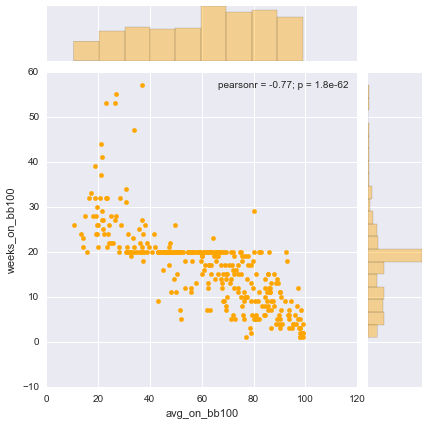

In [11]:
fig1 = sns.jointplot('avg_on_bb100', 'weeks_on_bb100', data=bb, kind='scatter', color="orange")

#Returns the :class:~matplotlib.figure.Figure instance the artist belongs to
# fig1 = ax1.get_figure()
fig1.savefig('avgbb_weeksbb_jointplot.jpg')


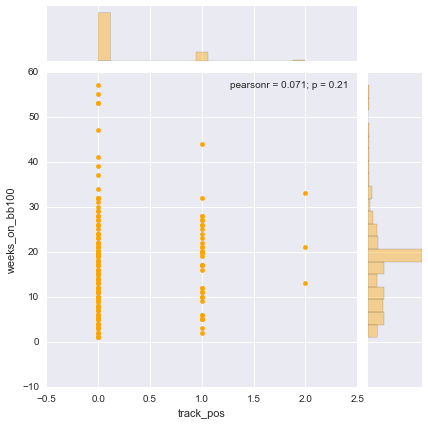

In [12]:
#a t-test is better for interpreting this plot
fig2 = sns.jointplot('track_pos', 'weeks_on_bb100', data=bb, kind='scatter', color="orange")

#Returns the :class:~matplotlib.figure.Figure instance the artist belongs to
fig2.savefig('track_pos_weeks_jointplot.jpg')


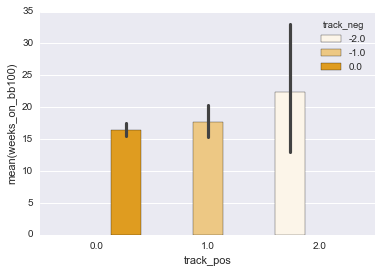

In [13]:
#a t-test is better for interpreting this plot
ax3 = sns.barplot('track_pos', 'weeks_on_bb100', data=bb, hue='track_neg', color="orange")

#Returns the :class:~matplotlib.figure.Figure instance the artist belongs to
fig3 = ax3.get_figure()
fig3.savefig('trackpos_weeksbb_bar.jpg')


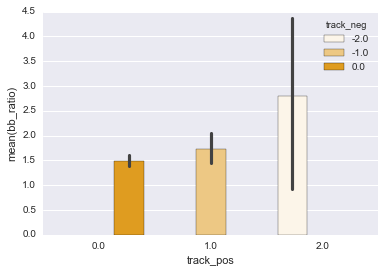

In [14]:
#a t-test is better for interpreting this plot
ax8 = sns.barplot('track_pos', 'bb_ratio', data=bb, hue='track_neg', color="orange")

#Returns the :class:~matplotlib.figure.Figure instance the artist belongs to
fig8 = ax8.get_figure()
fig8.savefig('trackpos_bb_ratio_bar.jpg')


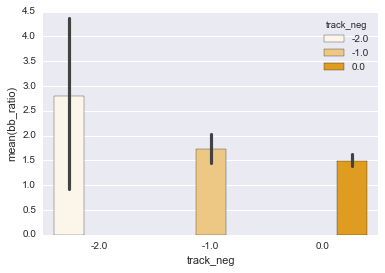

In [15]:
#a t-test is better for interpreting this plot
ax9 = sns.barplot('track_neg', 'bb_ratio', data=bb, hue='track_neg', color="orange")

#Returns the :class:~matplotlib.figure.Figure instance the artist belongs to
fig9 = ax9.get_figure()
fig9.savefig('trackneg_bb_ratio_bar.jpg')


In [16]:
from scipy.stats import ttest_ind

#ttest sample whether negative songs are more popular

cat3 = []
cat4 = []

for i, j in enumerate(bb['track_neg']):
    if j == 0:
        cat3.append(bb['bb_ratio'][i])
        
for a, b in enumerate(bb['track_neg']):
    if b < 0:
        cat4.append(bb['bb_ratio'][a])        
        

t_stata, p_vala = ttest_ind(cat3, cat4, equal_var=False)

print("T stat and P val:", t_stata, p_vala, "mean (category 3,4):", np.mean(cat3),np.mean(cat4))


('T stat and P val:', -1.7604263097403956, 0.082938288605145238, 'mean (category 3,4):', 1.4969929259769781, 1.7938996183586993)


In [17]:
from scipy.stats import ttest_ind

#ttest for whether more positive songs have higher bb_ratio

cat1 = []
cat2 = []

for i, j in enumerate(bb['track_pos']):
    if j == 0:
        cat1.append(bb['bb_ratio'][i])
        
for a, b in enumerate(bb['track_pos']):
    if b == 1 or 2:
        cat2.append(bb['bb_ratio'][a])        
        
t_stat1, p_val1 = ttest_ind(cat1, cat2, equal_var=False)

print("T stat and P val:", t_stat1, p_val1, "mean (category 1,2):", np.mean(cat1),np.mean(cat2) )


('T stat and P val:', -0.59226175594101249, 0.55391108145568058, 'mean (category 1,2):', 1.4969929259769781, 1.5456968628976389)


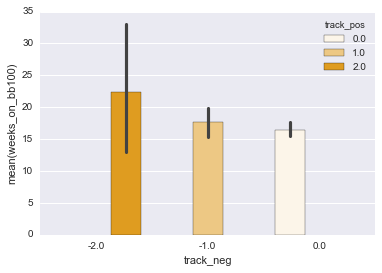

In [18]:
#a t-test is better for interpreting this plot
#note the black bars noting the standard deviation is high, because the sample for 2.0 is low (relatively few song titles had two 'negative' words)
ax4=sns.barplot('track_neg', 'weeks_on_bb100', data=bb, hue='track_pos', color="orange")


#Returns the :class:~matplotlib.figure.Figure instance the artist belongs to
fig4 = ax4.get_figure()
fig4.savefig('track_neg_weeks_bar.jpg')


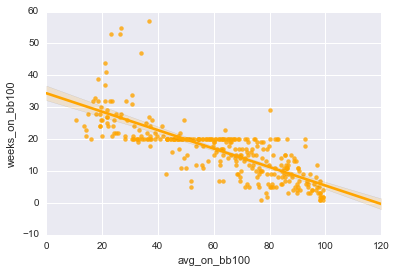

In [19]:
#there is a correlation between how long songs are popular and magnitude of how popular songs are
#note that the upper left region is where the biggest hits were - the songs with lower averages prolonged duration
#those 4-5 outliars really stand out
ax5=sns.regplot('avg_on_bb100', 'weeks_on_bb100', data=bb, color="orange")


#Returns the :class:~matplotlib.figure.Figure instance the artist belongs to
fig5 = ax5.get_figure()
fig5.savefig('avgbb_weeks.jpg')





#there may be some phenomenon with the data that leads to the above cap at 20 weeks
#perhaps that is when some radio shows typically stop playing such songs, with the exception of some 'instant classics'

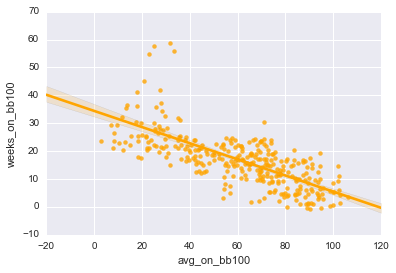

In [20]:
ax6 = sns.regplot('avg_on_bb100', 'weeks_on_bb100', data=bb, color="orange", fit_reg=1, x_jitter=10, y_jitter=5)
#by jittering the scatter plot the trend is a little more clear
fig6 = ax6.get_figure()
fig6.savefig('avgbb_weeks_jitter.jpg')



In [22]:
from sklearn import linear_model
import statsmodels.api as sm


#THIS 


X1 = np.array(bb['track_pos'], bb['track_neg']) #using both inputs
X = sm.add_constant(X1) #need to make sure to add the constant!
ys = bb['bb_ratio']
# Fit and summarize OLS model
mod = sm.OLS(ys, X)
res = mod.fit()
OLS_reg = res.summary()
fig7 = OLS_reg

fig7





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               bb_ratio   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     5.417
Date:                Fri, 24 Jun 2016   Prob (F-statistic):             0.0206
Time:                        16:02:15   Log-Likelihood:                -448.42
No. Observations:                 317   AIC:                             900.8
Df Residuals:                     315   BIC:                             908.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.4895      0.061     24.386      0.000         1.369     1.610
x1             0.3241      0.139      2.327      0.021         0.050     0.598
==============================================================================
Omnibus:                      146.943   Durbin-Watson:                   0.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              553.378
Skew:                           2.067   Prob(JB):                    6.85e-121
Kurtosis:                       7.981   Cond. No.                         2.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#THIS HAS A CONSTANT AND ONLY USES NEGATIVE RATINGS AS INPUT


X2 = np.array(bb['track_neg']) #how predictive is just track_neg
X3 = sm.add_constant(X2)
ys = bb['bb_ratio']
# Fit and summarize OLS model
mod1 = sm.OLS(ys, X3)
res1 = mod1.fit()
OLS_reg = res1.summary()
fig10 = OLS_reg

fig10





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               bb_ratio   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     5.417
Date:                Fri, 24 Jun 2016   Prob (F-statistic):             0.0206
Time:                        16:07:17   Log-Likelihood:                -448.42
No. Observations:                 317   AIC:                             900.8
Df Residuals:                     315   BIC:                             908.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.4895      0.061     24.386      0.000         1.369     1.610
x1            -0.3241      0.139     -2.327      0.021        -0.598    -0.050
==============================================================================
Omnibus:                      146.943   Durbin-Watson:                   0.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              553.378
Skew:                           2.067   Prob(JB):                    6.85e-121
Kurtosis:                       7.981   Cond. No.                         2.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""